In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import contractions
import nltk
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [3]:
df=pd.read_csv("dataset.csv")
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
df['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [9]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [11]:
df.drop(df[df['statement'].isnull()==True].index,axis=0,inplace=True)

In [13]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [15]:
df.shape

(52681, 2)

C:\Users\HP\AppData\Local\Temp\ipykernel_3092\2543668181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='status',data=df,palette='Set2')


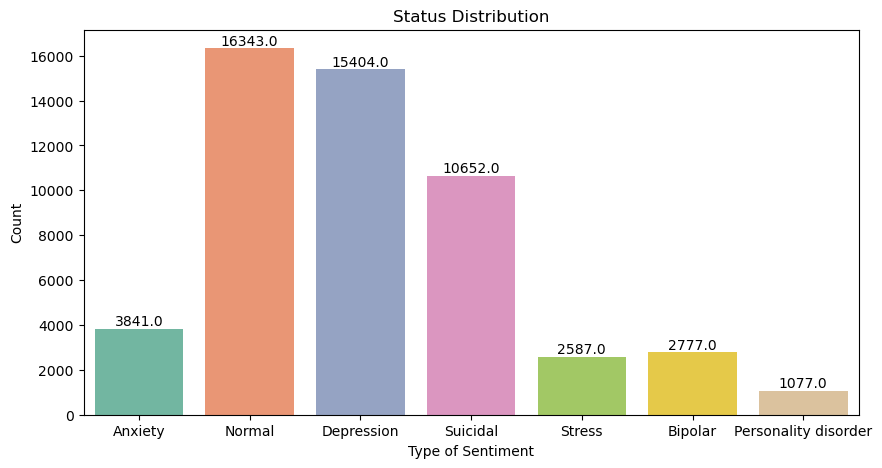

In [17]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='status',data=df,palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center',  
                va='bottom',  
                fontsize=10,  
                color='black') 
plt.title("Status Distribution")
plt.xlabel('Type of Sentiment')
plt.ylabel('Count')
#plt.grid()
plt.show()

max status in the dataset is normal followed by deprrssion and sucidal

In [19]:
df.head(5)

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [21]:
# Calculate the number of characters and sentences
df['num_of_characters'] = df['statement'].str.len()
df['num_of_sentences'] = df['statement'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Generate descriptive statistics
description = df[['num_of_characters', 'num_of_sentences']].describe()

# Display the descriptive statistics
print(description)

       num_of_characters  num_of_sentences
count       52681.000000      52681.000000
mean          578.713863          6.280215
std           846.269078         10.688388
min             2.000000          1.000000
25%            80.000000          1.000000
50%           317.000000          3.000000
75%           752.000000          8.000000
max         32759.000000       1260.000000


In [23]:
def to_lowercase(text):
    return text.lower()

df['cleaned_statement'] = df['statement'].apply(lambda x: to_lowercase(x))
df['status'] = df['status'].apply(lambda x: to_lowercase(x))
print(df['cleaned_statement']) 
print(df['status'])

0                                               oh my gosh
1        trouble sleeping, confused mind, restless hear...
2        all wrong, back off dear, forward doubt. stay ...
3        i've shifted my focus to something else but i'...
4        i'm restless and restless, it's been a month n...
                               ...                        
53038    nobody takes me seriously i’ve (24m) dealt wit...
53039    selfishness  "i don't feel very good, it's lik...
53040    is there any way to sleep better? i can't slee...
53041    public speaking tips? hi, all. i have to give ...
53042    i have really bad door anxiety! it's not about...
Name: cleaned_statement, Length: 52681, dtype: object
0        anxiety
1        anxiety
2        anxiety
3        anxiety
4        anxiety
          ...   
53038    anxiety
53039    anxiety
53040    anxiety
53041    anxiety
53042    anxiety
Name: status, Length: 52681, dtype: object


In [25]:
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

df['cleaned_statement'] = df['cleaned_statement'].apply(remove_numeric)
df['cleaned_statement']

0                                               oh my gosh
1        trouble sleeping, confused mind, restless hear...
2        all wrong, back off dear, forward doubt. stay ...
3        i've shifted my focus to something else but i'...
4        i'm restless and restless, it's been a month n...
                               ...                        
53038    nobody takes me seriously i’ve (m) dealt with ...
53039    selfishness  "i don't feel very good, it's lik...
53040    is there any way to sleep better? i can't slee...
53041    public speaking tips? hi, all. i have to give ...
53042    i have really bad door anxiety! it's not about...
Name: cleaned_statement, Length: 52681, dtype: object

In [27]:
def expand(text):
    expanded_text = contractions.fix(text)
    return expanded_text

df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: expand(x))

df['cleaned_statement'] 

0                                               oh my gosh
1        trouble sleeping, confused mind, restless hear...
2        all wrong, back off dear, forward doubt. stay ...
3        i have shifted my focus to something else but ...
4        i am restless and restless, it is been a month...
                               ...                        
53038    nobody takes me seriously i have (m) dealt wit...
53039    selfishness  "i do not feel very good, it is l...
53040    is there any way to sleep better? i cannot sle...
53041    public speaking tips? hi, all. i have to give ...
53042    i have really bad door anxiety! it is not abou...
Name: cleaned_statement, Length: 52681, dtype: object

In [29]:
# Function to remove punctuation, special characters and other unwanted symbols
def remove_punctuatiom_special_char(sentence):
    return re.sub(r'[^A-Za-z0-9\s]+', '', sentence)

# Apply the cleaning function to each statement in the DataFrame
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: remove_punctuatiom_special_char(x))

# Display the cleaned statements
print("Statements after removing punctuation and special characters:\n", df['cleaned_statement'])


Statements after removing punctuation and special characters:
 0                                               oh my gosh
1        trouble sleeping confused mind restless heart ...
2        all wrong back off dear forward doubt stay in ...
3        i have shifted my focus to something else but ...
4        i am restless and restless it is been a month ...
                               ...                        
53038    nobody takes me seriously i have m dealt with ...
53039    selfishness  i do not feel very good it is lik...
53040    is there any way to sleep better i cannot slee...
53041    public speaking tips hi all i have to give a p...
53042    i have really bad door anxiety it is not about...
Name: cleaned_statement, Length: 52681, dtype: object


In [31]:
# Function to remove words containing both alphabets and numbers
def remove_alphanumeric_words(sentence):
    # Split the sentence into words and filter out alphanumeric words
    words = sentence.split()
    cleaned_words = [word for word in words if not re.search(r'[A-Za-z]', word) or not re.search(r'[0-9]', word)]
    return ' '.join(cleaned_words)

# Apply the function to the 'statement' column in the DataFrame
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: remove_alphanumeric_words(x))

# Display the cleaned statements
print("Statements after removing alphanumeric words:\n", df['cleaned_statement'])


Statements after removing alphanumeric words:
 0                                               oh my gosh
1        trouble sleeping confused mind restless heart ...
2        all wrong back off dear forward doubt stay in ...
3        i have shifted my focus to something else but ...
4        i am restless and restless it is been a month ...
                               ...                        
53038    nobody takes me seriously i have m dealt with ...
53039    selfishness i do not feel very good it is like...
53040    is there any way to sleep better i cannot slee...
53041    public speaking tips hi all i have to give a p...
53042    i have really bad door anxiety it is not about...
Name: cleaned_statement, Length: 52681, dtype: object


In [33]:
# Function to tokenize and then join back as a sentence

def tokenize_and_join(text):
    # Tokenize into sentences, then words
    sentences = sent_tokenize(text)
    tokenized_sentences = [' '.join(word_tokenize(sentence)) for sentence in sentences] 
    return ' '.join(tokenized_sentences)  # Join all tokenized sentences back into a single string

# Apply the function to the 'statement' column in the DataFrame
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: tokenize_and_join(x))

# Display the tokenized and joined sentences
print("Tokenized and joined sentences:\n", df['cleaned_statement'])


Tokenized and joined sentences:
 0                                               oh my gosh
1        trouble sleeping confused mind restless heart ...
2        all wrong back off dear forward doubt stay in ...
3        i have shifted my focus to something else but ...
4        i am restless and restless it is been a month ...
                               ...                        
53038    nobody takes me seriously i have m dealt with ...
53039    selfishness i do not feel very good it is like...
53040    is there any way to sleep better i can not sle...
53041    public speaking tips hi all i have to give a p...
53042    i have really bad door anxiety it is not about...
Name: cleaned_statement, Length: 52681, dtype: object


In [39]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem each word in a sentence
def stem_sentence(text):
    words = word_tokenize(text)  # Tokenize into words
    stemmed_words = [stemmer.stem(word) for word in words]  # Stem each word
    return ' '.join(stemmed_words)  # Join stemmed words back into a sentence

# Apply stemming to the 'cleaned_statement' column
df['cleaned_statement'] = df['cleaned_statement'].apply(stem_sentence)

df['cleaned_statement']

0                                               oh my gosh
1        troubl sleep confus mind restless heart all ou...
2        all wrong back off dear forward doubt stay in ...
3        i have shift my focu to someth els but i am st...
4        i am restless and restless it is been a month ...
                               ...                        
53038    nobodi take me serious i have m dealt with dep...
53039    selfish i do not feel veri good it is like i d...
53040    is there ani way to sleep better i can not sle...
53041    public speak tip hi all i have to give a prese...
53042    i have realli bad door anxieti it is not about...
Name: cleaned_statement, Length: 52681, dtype: object

In [35]:
#Removal of stopwaords

# Initialize the set of English stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a sentence
def remove_stop_words(sentence):
    words = sentence.split()  # Split the sentence into words
    filtered_words = [word for word in words if word not in stop_words]  # Filter out stop words
    return ' '.join(filtered_words)  # Join the remaining words back into a sentence

# Apply the function to the 'cleaned_statement' column in the DataFrame
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: remove_stop_words(x))

# Display the statements without stop words
print("Statements after stop words removal:\n", df['cleaned_statement'])


Statements after stop words removal:
 0                                                  oh gosh
1        trouble sleeping confused mind restless heart ...
2        wrong back dear forward doubt stay restless re...
3               shifted focus something else still worried
4                         restless restless month boy mean
                               ...                        
53038    nobody takes seriously dealt depressionanxiety...
53039    selfishness feel good like belong world think ...
53040              way sleep better sleep nights meds help
53041    public speaking tips hi give presentation work...
53042    really bad door anxiety scared lock door somet...
Name: cleaned_statement, Length: 52681, dtype: object


In [37]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Ensure the necessary resources are downloaded
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the wordnet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

# Function to lemmatize a sentence (word by word)
def lemmatize_sentence(sentence):
    words = nltk.word_tokenize(sentence)  # Tokenize the sentence
    pos_tags = nltk.pos_tag(words)  # Get POS tags
    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags
    ]  # Lemmatize each word with its POS tag
    return ' '.join(lemmatized_words)  # Join the lemmatized words back into a sentence

# Apply the function to the 'cleaned_statement' column in the DataFrame
df['cleaned_statement'] = df['cleaned_statement'].apply(lambda x: lemmatize_sentence(x))

# Display the lemmatized statements
print("Lemmatized statements:\n", df['cleaned_statement'])


Lemmatized statements:
 0                                               oh my gosh
1        trouble sleep confuse mind restless heart all ...
2        all wrong back off dear forward doubt stay in ...
3        i have shift my focus to something else but i ...
4        i be restless and restless it be be a month no...
                               ...                        
53038    nobody take me seriously i have m dealt with d...
53039    selfishness i do not feel very good it be like...
53040    be there any way to sleep good i can not sleep...
53041    public speak tip hi all i have to give a prese...
53042    i have really bad door anxiety it be not about...
Name: cleaned_statement, Length: 52681, dtype: object


In [41]:
df

,statement,status,num_of_characters,num_of_sentences,cleaned_statement
0,oh my gosh,anxiety,10,1,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",anxiety,64,2,troubl sleep confus mind restless heart all ou...
2,"All wrong, back off dear, forward doubt. Stay ...",anxiety,78,2,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,anxiety,61,1,i have shift my focu to someth els but i am st...
4,"I'm restless and restless, it's been a month n...",anxiety,72,2,i am restless and restless it is been a month ...
...,...,...,...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,anxiety,1766,16,nobodi take me serious i have m dealt with dep...
53039,"selfishness ""I don't feel very good, it's lik...",anxiety,1012,12,selfish i do not feel veri good it is like i d...
53040,Is there any way to sleep better? I can't slee...,anxiety,85,2,is there ani way to sleep better i can not sle...
53041,"Public speaking tips? Hi, all. I have to give ...",anxiety,401,6,public speak tip hi all i have to give a prese...


In [43]:
cleaned_df=df.iloc[:,1:]
cleaned_df

,status,num_of_characters,num_of_sentences,cleaned_statement
0,anxiety,10,1,oh my gosh
1,anxiety,64,2,troubl sleep confus mind restless heart all ou...
2,anxiety,78,2,all wrong back off dear forward doubt stay in ...
3,anxiety,61,1,i have shift my focu to someth els but i am st...
4,anxiety,72,2,i am restless and restless it is been a month ...
...,...,...,...,...
53038,anxiety,1766,16,nobodi take me serious i have m dealt with dep...
53039,anxiety,1012,12,selfish i do not feel veri good it is like i d...
53040,anxiety,85,2,is there ani way to sleep better i can not sle...
53041,anxiety,401,6,public speak tip hi all i have to give a prese...


In [45]:
cleaned_df.isnull().sum()

status               0
num_of_characters    0
num_of_sentences     0
cleaned_statement    0
dtype: int64

In [47]:
cleaned_df.drop(cleaned_df[cleaned_df['cleaned_statement'].isnull()==True].index,axis=0,inplace=True)

In [49]:
cleaned_df.isnull().sum()

status               0
num_of_characters    0
num_of_sentences     0
cleaned_statement    0
dtype: int64

In [51]:
cleaned_df.to_csv("cleaned_dataset.csv",index=False)

In [53]:
status_unique=cleaned_df['status'].unique()
status_unique

array(['anxiety', 'normal', 'depression', 'suicidal', 'stress', 'bipolar',
       'personality disorder'], dtype=object)

In [55]:
cleaned_df

,status,num_of_characters,num_of_sentences,cleaned_statement
0,anxiety,10,1,oh my gosh
1,anxiety,64,2,troubl sleep confus mind restless heart all ou...
2,anxiety,78,2,all wrong back off dear forward doubt stay in ...
3,anxiety,61,1,i have shift my focu to someth els but i am st...
4,anxiety,72,2,i am restless and restless it is been a month ...
...,...,...,...,...
53038,anxiety,1766,16,nobodi take me serious i have m dealt with dep...
53039,anxiety,1012,12,selfish i do not feel veri good it is like i d...
53040,anxiety,85,2,is there ani way to sleep better i can not sle...
53041,anxiety,401,6,public speak tip hi all i have to give a prese...
